In [ ]:
# Importing Yahoo Finance

!pip install yfinance

In [27]:
##### Import packages ##### 

import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew, kurtosis, norm, skewtest, kurtosistest, chisquare

In [28]:
##### Get the Data from the selected Stock using Yahoo Finance ##### 

symbol = "GOOG"
ticker = yfinance.Ticker(symbol)
df = ticker.history(interval="1d",start="2016-02-25",end="2021-02-26")
daily_close = df['Close']


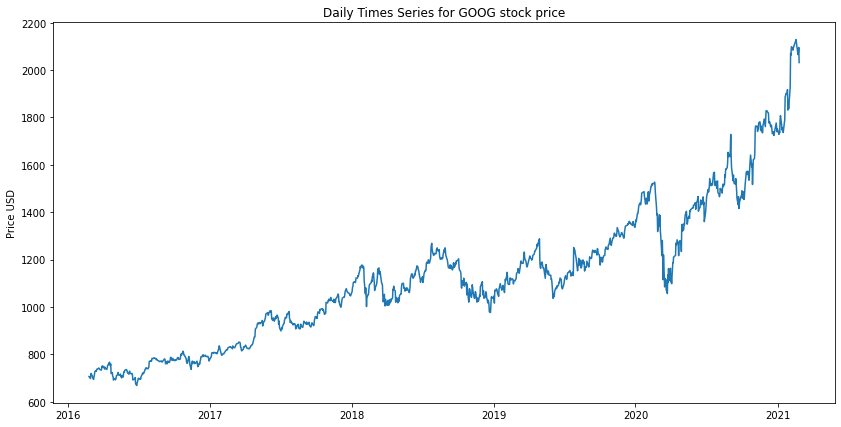

In [29]:
##### Plotting the 5y Price Evolution ##### 

plt.figure(figsize=(14,7))
plt.plot(daily_close)
plt.ylabel("Price USD")
plt.title(f'Daily Times Series for {symbol} stock price')
plt.show()

# Conclusions on the chart above 

## We can clearly see that Google Stock Price has a Bullish Pattern (tendency to rise over time)

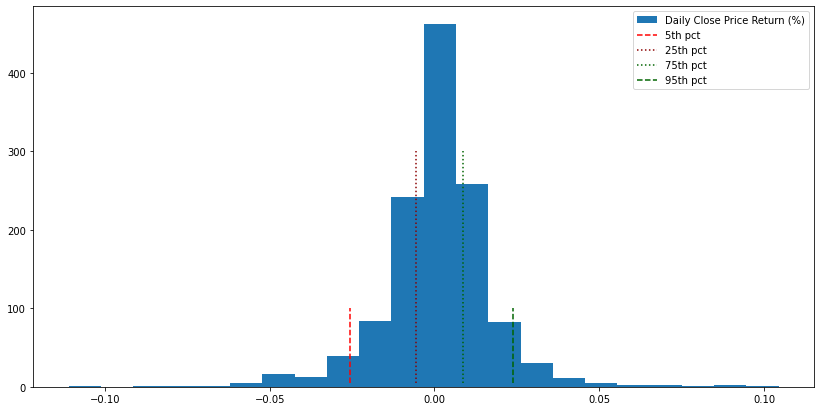

In [30]:
##### Get the daily percentage change ##### 

return_pct = daily_close.pct_change(1).dropna()

##### Ploting the percentage change #####

plt.figure(figsize=(14,7))
plt.hist(return_pct,bins="rice",label="Daily Close Price Return (%)")

plt.vlines(np.quantile(return_pct, 0.05), ymin=5, ymax=100, linestyles='dashed', colors="red", label='5th pct')
plt.vlines(np.quantile(return_pct, 0.25), ymin=5, ymax=300, linestyles='dotted', colors="darkred", label='25th pct')
plt.vlines(np.quantile(return_pct, 0.75), ymin=5, ymax=300, linestyles='dotted', colors="darkgreen", label='75th pct')
plt.vlines(np.quantile(return_pct, 0.95), ymin=5, ymax=100, linestyles='dashed', colors="darkgreen", label='95th pct')
plt.legend()

plt.show()

# The plot above shows most observations around zero, and seems to be symmetric

## But, after ploting vertical percentile lines, we see that tails have a lot of information

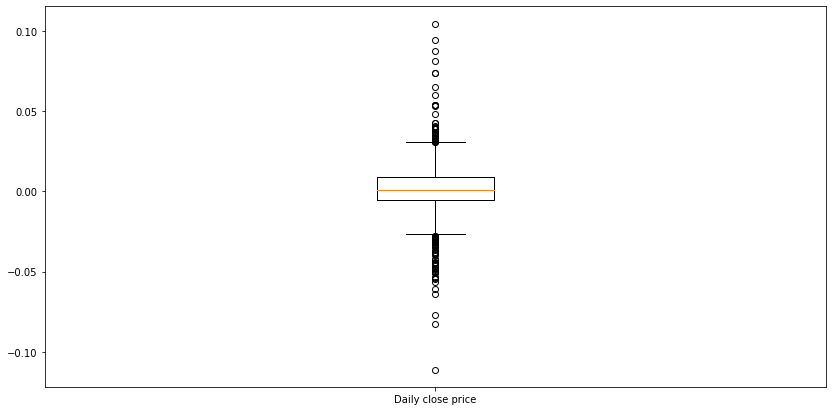

In [31]:
plt.figure(figsize=(14,7))
plt.boxplot(return_pct,labels=["Daily close price"])
plt.show()

# After doing a boxplot we can confirm that we have a lot of outliers

## The narrow IQR lead us to a fat tails

In [32]:
##### Get statistical info with describe method #####

return_pct.describe()

count    1259.000000
mean        0.000979
std         0.016683
min        -0.111008
25%        -0.005660
50%         0.001077
75%         0.008809
max         0.104485
Name: Close, dtype: float64

In [34]:
if skew(return_pct) == 0:
    print(f'The Skew is {skew(return_pct)}, which means {symbol} returns distribution is symmetrical\n')
    
elif skew(return_pct) > 0:
    print(f'The Skew is {skew(return_pct)}, which means {symbol} returns distribution is not symmetrical (positive skewed)\n')
    
elif skew(return_pct) < 0:
    print(f'The Skew is {skew(return_pct)}, which means {symbol} returns distribution is not symmetrical (negative skewed)\n')          


The Skew is -0.08853084181834438, which means GOOG returns distribution is not symmetrical (negative skewed)



In [35]:
if kurtosis(return_pct) == 0:
    print(f'The Kurtosis is {kurtosis(return_pct)}, which means {symbol} returns are Mesokurtic: presence of normal distribution\n')
    
elif kurtosis(return_pct) > 3:
    print(f'The Kurtosis is {kurtosis(return_pct)}, which means {symbol} returns are Leptokurtic: heavy-tailed or profusion of outliers\n')
    
elif kurtosis(return_pct) < 3:
    print(f'The Kurtosis is {kurtosis(return_pct)}, which means {symbol} returns are Platykurtic: light-tailed or lack of outliers\n')

print(f'Kurtosis p-value is:, {kurtosistest(return_pct)[1]}\n')


if kurtosistest(return_pct)[1] <= 0.05:
    print("The Kurtosis test has a p-value <= 0.05, which means that we reject the Null Hypotesis (kurtosis 0 = normal distribution)")
elif kurtosistest(return_pct)[1] > 0.05:
    print("The Kurtosis test has a p-value > 0.05, which means that we reject the Null Hypotesis (kurtosis 0 = normal distribution)")

The Kurtosis is 6.671496193977973, which means GOOG returns are Leptokurtic: heavy-tailed or profusion of outliers

Kurtosis p-value is:, 5.491755297105162e-41

The Kurtosis test has a p-value <= 0.05, which means that we reject the Null Hypotesis (kurtosis 0 = normal distribution)


# Kurtosis is > 3 and Skewness != 0, so data is most likely non normal

## The excess Kurtosis shows high risk, since outliers are more common

In [36]:
#H0: Our data is a Normal distribution
#H1: Our data is not Normal distribution

p_value = stats.shapiro(return_pct)[1]


if p_value <= 0.05:
    print("Null hypotesis of normality is Rejected")
else:
    print("Null hypotesis of normality IS NOT Rejected")
print(p_value)

Null hypotesis of normality is Rejected
1.1243565148637083e-26


In [263]:
data = yfinance.download("AAPL GOOG TSLA MSFT", start="2016-02-25", end="2021-02-26")

spx = yfinance.download("SPY", start="2016-02-25", end="2021-02-26")


[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,GOOG,MSFT,TSLA
Date,,,,
2016-02-25,24.190001,705.750000,52.099998,37.486000
2016-02-26,24.227501,705.070007,51.299999,38.068001
2016-02-29,24.172501,697.770020,50.880001,38.386002
2016-03-01,25.132500,718.809998,52.580002,37.270000
2016-03-02,25.187500,718.849976,52.950001,37.667999
...,...,...,...,...
2021-02-19,129.869995,2101.139893,240.970001,781.299988
2021-02-22,126.000000,2064.879883,234.509995,714.500000
2021-02-23,125.860001,2070.860107,233.270004,698.840027


Text(0.5, 1.0, 'Daily Times Series for the Tesla')

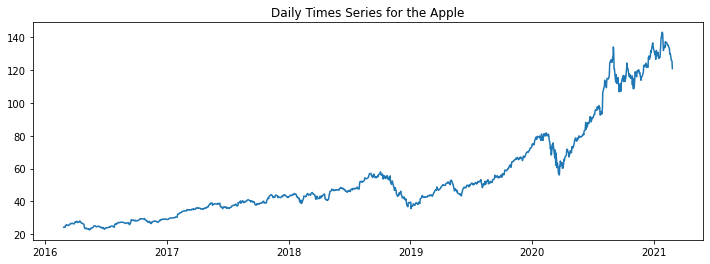

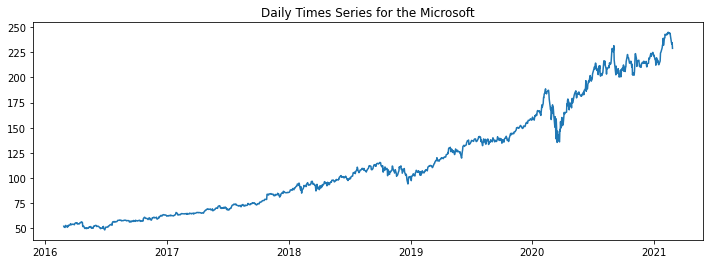

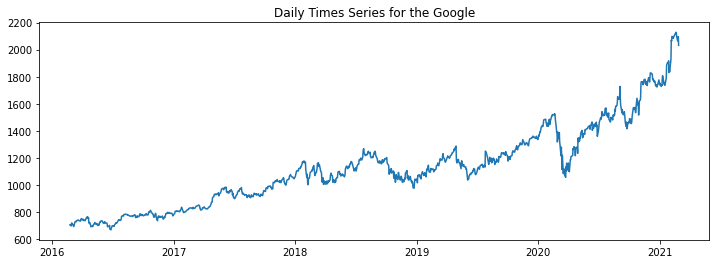

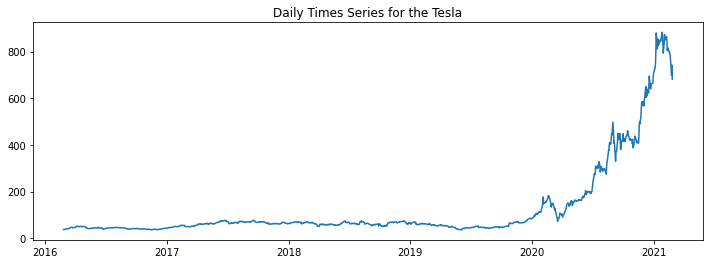

In [203]:
plt.figure(figsize=(12, 4))
#Apple
plt.subplot(1, 1, 1)
plt.plot(data.index, data['Close']['AAPL'])
plt.title('Daily Times Series for the Apple')

plt.figure(figsize=(12, 4))
#Microsoft
plt.subplot(1, 1, 1)
plt.plot(data.index, data['Close']['MSFT'])
plt.title('Daily Times Series for the Microsoft')

plt.figure(figsize=(12, 4))
#Google
plt.subplot(1, 1, 1)
plt.plot(data.index, data['Close']['GOOG'])
plt.title('Daily Times Series for the Google')

plt.figure(figsize=(12, 4))
#Tesla
plt.subplot(1, 1, 1)
plt.plot(data.index, data['Close']['TSLA'])
plt.title('Daily Times Series for the Tesla')

In [149]:
df1 = data["Close"]
df2 = spx["Close"]

c, p = stats.pearsonr(df1['AAPL'].dropna(), df2.dropna())
print(f"AAPL vs SPX Pearson Correlation: {c}\n")

c, p = stats.pearsonr(df1['GOOG'].dropna(), df2.dropna())
print(f"GOOG vs SPX Pearson Correlation: {c}\n")

c, p = stats.pearsonr(df1['TSLA'].dropna(), df2.dropna())
print(f"TSLA vs SPX Pearson Correlation: {c}\n")

c, p = stats.pearsonr(df1['MSFT'].dropna(), df2.dropna())
print(f"MSFT vs SPX Pearson Correlation: {c}\n")

AAPL vs SPX Pearson Correlation: 0.920703428344498

GOOG vs SPX Pearson Correlation: 0.9776183236045377

TSLA vs SPX Pearson Correlation: 0.7449751622649459

MSFT vs SPX Pearson Correlation: 0.9381641833258054



In [270]:
#Saving our data in Excel Files to use in Tableau

daily_close.to_excel("Google_5y",sheet_name="Google", engine='xlsxwriter')
data.to_excel("AGMT_5y",sheet_name="AGMT", engine='xlsxwriter')
spx.to_excel("Spx_5y",sheet_name="SPX500", engine='xlsxwriter')
return_pct.to_excel("Google_5y_pct",sheet_name="Google", engine='xlsxwriter')